In [ ]:
# KNN Classification
from pandas import read_csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [ ]:
Zoo = pd.read_csv('Zoo.csv')

In [ ]:
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# **EDA and Visualization**

In [ ]:
Zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [ ]:
Zoo.info() #101 rows, 18 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
Zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
Zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [ ]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
Zoo[Zoo.duplicated()].shape #no duplicate rows

(0, 18)

In [ ]:
Zoo.corr()

<ipython-input-104-d2075791c33f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: xlabel='type', ylabel='count'>

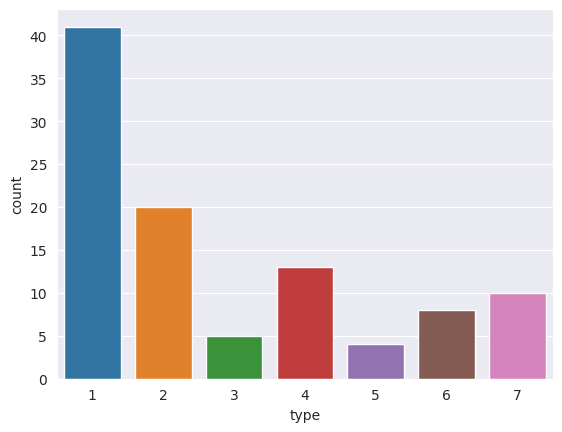

In [ ]:
sns.countplot(x = 'type', data = Zoo)

[]

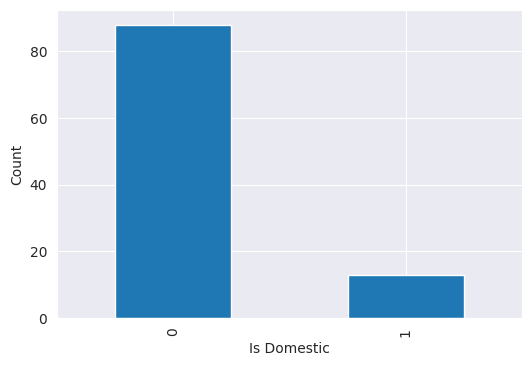

In [ ]:
# Lets plot to check how many animals are domestic
plt.figure(figsize=(6,4))
Zoo.domestic.value_counts().plot(kind="bar")
plt.xlabel('Is Domestic')
plt.ylabel("Count")
plt.plot()

[]

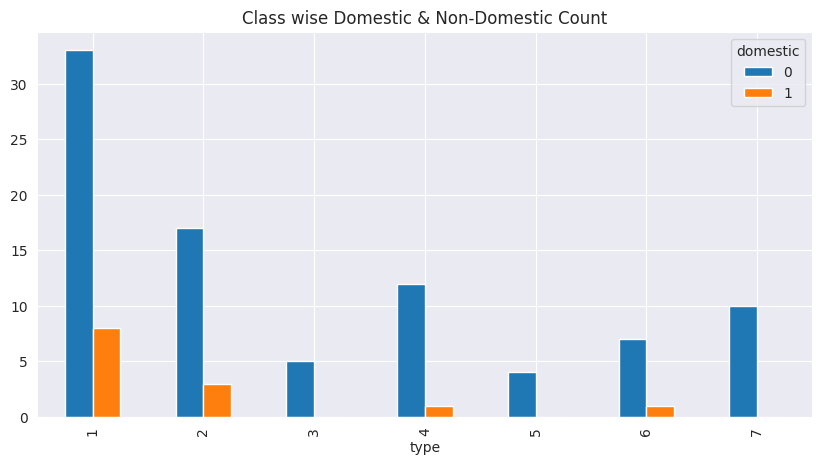

In [ ]:
# Species wise domestic and non-domestic animals
pd.crosstab(Zoo.type, Zoo.domestic).plot(kind="bar", figsize=(10, 5), title="Class wise Domestic & Non-Domestic Count")
plt.plot()

<Axes: title={'center': 'Class wise Milk providing animals'}, xlabel='type'>

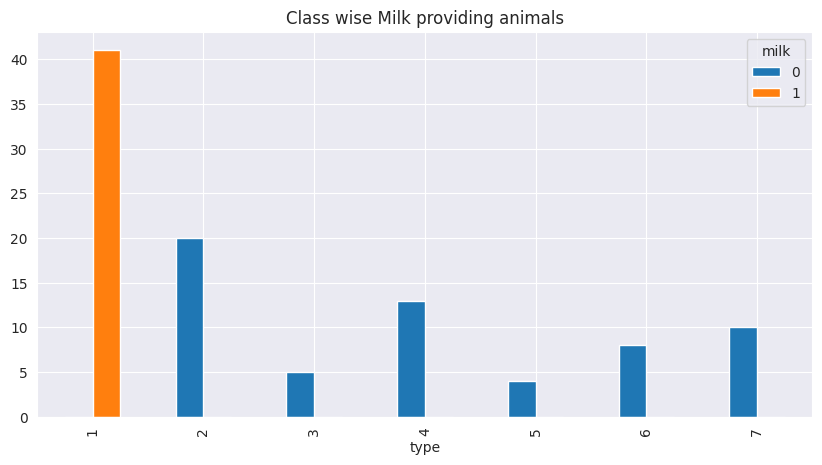

In [ ]:
#Animals that provide milk
pd.crosstab(Zoo.type, Zoo.milk).plot(kind="bar", title="Class wise Milk providing animals",figsize=(10, 5))

<Axes: xlabel='type'>

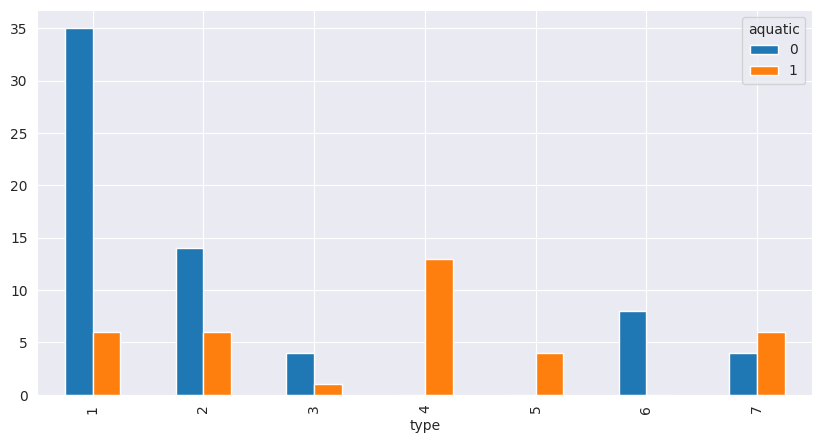

In [ ]:
#Aquatic animals category wise
pd.crosstab(Zoo.type, Zoo.aquatic).plot(kind="bar", figsize=(10, 5))

In [ ]:
# Removing unnecessary column
data = Zoo.drop('animal name', axis = 1)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
data.info() #17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [ ]:
#splitting data into X and Y
X = data.iloc[:, :16]
Y = data['type']

In [ ]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [119]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,random_state=45) #70% data will be train data
#stratification=Y--> train_test_split returns training and test subsets that have the same proportions of class labels as the input dataset.

In [125]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (70, 16)
Shape of x_test:  (31, 16)
Shape of y_train:  (70,)
Shape of y_test:  (31,)


# **KNN Algorithm**

In [149]:
num_folds = 10
kfold = KFold(n_splits=10)

In [151]:
# Fit k-nearest neighbors classifier with training sets for n = 3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
# predicting on test data
y_pred = model.predict(x_test)

In [153]:
pd.Series(y_pred).value_counts() # getting the count of each category

1    10
2    10
4     7
6     2
5     2
dtype: int64

In [154]:
y_pred

array([1, 1, 1, 6, 2, 6, 2, 2, 4, 2, 4, 5, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1,
       2, 4, 4, 4, 4, 5, 2, 2, 2])

In [155]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_df

,Actual,Predicted
0,1,1
1,1,1
64,1,1
40,6,6
83,2,2
51,6,6
79,2,2
71,2,2
2,4,4
43,2,2


In [156]:
pd.crosstab(y_test,y_pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,4,5,6
type,,,,,
1,10,0,2,0,0
2,0,10,0,0,0
3,0,0,2,0,0
4,0,0,3,0,0
5,0,0,0,2,0
6,0,0,0,0,2


In [ ]:
# 4 wrong predictions and 27 correct predictions

In [157]:
print("Accuracy", accuracy_score(y_test,y_pred)*100)

Accuracy 87.09677419354838


In [158]:
#Get cross validation score of K-Nearest Neighbors
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)

94.0


# **Grid SearchCV for Algorithm Tuning**

In [159]:
neighbors = np.array(range(1,40))
grid_param = dict(n_neighbors=neighbors)

In [160]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=grid_param)
grid.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [161]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# **Visualizing the CV Results**

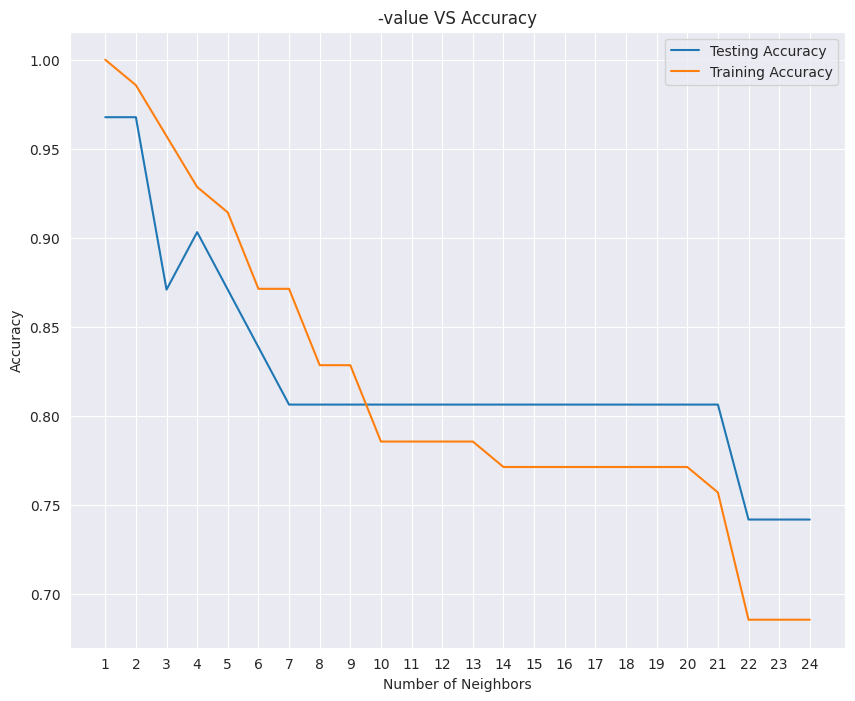

Best accuracy is 0.967741935483871 with K = 1


In [162]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 25)
# empty list to store scores
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_range):
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit with knn
    knn.fit(x_train, y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    #test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

#plot
plt.figure(figsize=[10,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

We can see that at K=1 we have high value of accuracy. Hence we will perform the test with K=1

# **Fitting a Model**

In [163]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [164]:
#Predicting on test data
preds = KNN_model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    12
2    10
4     4
6     2
5     2
3     1
dtype: int64

In [165]:
preds

array([1, 1, 1, 6, 2, 6, 2, 2, 4, 2, 3, 5, 1, 1, 1, 1, 2, 4, 1, 1, 2, 1,
       2, 4, 4, 1, 1, 5, 2, 2, 2])

In [166]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : preds})
pred_df

,Actual,Predicted
0,1,1
1,1,1
64,1,1
40,6,6
83,2,2
51,6,6
79,2,2
71,2,2
2,4,4
43,2,2


In [167]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3,4,5,6
type,,,,,,
1,12,0,0,0,0,0
2,0,10,0,0,0,0
3,0,0,1,1,0,0
4,0,0,0,3,0,0
5,0,0,0,0,2,0
6,0,0,0,0,0,2


In [ ]:
#1 wrong prediction and 30 correct predictions

In [168]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 96.7741935483871


In [169]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67         2
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.96      0.92      0.92        31
weighted avg       0.98      0.97      0.96        31

